In [1]:
import torch
from torch import nn
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from PIL import Image

train_data = datasets.MNIST(root = './data', train = True, download = False, transform = transforms.ToTensor())
test_data = datasets.MNIST(root = './data', train = False, download = False, transform = transforms.ToTensor())

#hyperparameters:

batch_size = 100 #in huge datasets it is customary to use batch size and updating parameters each batch until it covers the whole 
#dataset each epoch. It is also customary to use powers of 2 for the batch size.

learning_rate = 0.001

m = len(train_data) #total no. of examples 

n_epoch = 4 #an epoch ends when the whole training set is covered.

input_size = len(train_data[0][0][0])*len(train_data[0][0][0][0]) #I hate tensors

dimensions = {"L0": input_size, "L1": 400, "L2": 400, "L3":10} #number of nodes in each layer, L4 is the output. 10 IS FIXED


train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True) #The dataset is shuffled every epoch
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)


In [2]:
#setting up model
class NeuralNetwork(nn.Module):
    def __init__(self, dimensions):
        super(NeuralNetwork, self).__init__()
        self.L1 = nn.Linear(dimensions['L0'], dimensions['L1'])
        self.relu = nn.ReLU()
        self.L2 = nn.Linear(dimensions['L1'], dimensions['L2'])
        self.L3 = nn.Linear(dimensions['L2'], dimensions['L3'])

        #self.L4 = nn.Linear(dimensions['L3'], dimensions['L4'])
    def forward(self, x): #x is the input
        #3 layers, each with relu except the last layer.
        x = self.L1(x)
        x = self.relu(x)
        x = self.L2(x)
        x = self.relu(x)
        y_predict= self.L3(x)

        return y_predict
model = NeuralNetwork(dimensions)

In [3]:
#setting up loss and optimizer:
lossf = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [4]:
#the for loops for each epoch and minibatch:
for epoch in range(n_epoch):
    for i, (images, labels) in enumerate(train_loader): #explain this line pls
        
        y_predict = model(images.reshape(-1,input_size)) #forward prop, -1 automatically adjusts the dimensions
        
        loss = lossf(y_predict, labels)
        loss.backward() #backprop
        
        optimizer.step() #update parameters
        optimizer.zero_grad() #resets the gradients
        if (i+1) % batch_size == 0:
            print(f'At {i+1} step, loss is {loss}')

At 100 step, loss is 0.322780966758728
At 200 step, loss is 0.3573397397994995
At 300 step, loss is 0.09105592966079712
At 400 step, loss is 0.18227067589759827
At 500 step, loss is 0.20271241664886475
At 600 step, loss is 0.09381941705942154
At 100 step, loss is 0.07978372275829315
At 200 step, loss is 0.11512243002653122
At 300 step, loss is 0.07925353199243546
At 400 step, loss is 0.04403005912899971
At 500 step, loss is 0.1127266138792038
At 600 step, loss is 0.04389209300279617
At 100 step, loss is 0.06297613680362701
At 200 step, loss is 0.1073368489742279
At 300 step, loss is 0.01042657159268856
At 400 step, loss is 0.06671695411205292
At 500 step, loss is 0.04321647062897682
At 600 step, loss is 0.0562216155230999
At 100 step, loss is 0.03256068751215935
At 200 step, loss is 0.008422385901212692
At 300 step, loss is 0.10591092705726624
At 400 step, loss is 0.05357365310192108
At 500 step, loss is 0.07148992270231247
At 600 step, loss is 0.004701224155724049


In [6]:
label_predicted = torch.max(y_predict, 1)[1]
print((label_predicted == 2).sum())

tensor(8)


In [7]:
# test the model
with torch.no_grad():
    n_correct = 0
    n_total = 0
    for i, (images, labels) in enumerate(test_loader):
        y_predict = model(images.reshape(-1,input_size))
        labels_predict = torch.max(y_predict,1)[1] #turns y_predict into labels from 0 to 9 by using torch.max function

        n_correct += (labels_predict == labels).sum().item() #insanely quick way of adding up number correct.
        # labels_predict == labels returns an array of trues and falses, .sum adds up all the trues and falses as 1 and 0
        #  .sum returns a tensor so .item extracts the original value and adds it to n_correct
        n_total += batch_size
    accuracy = n_correct / (n_total)
print(f'Accuracy is {100*accuracy}%')
            

Accuracy is 97.47%


tensor([[-12.6789,   4.5217,   7.5342,  -0.2076, -20.7935,  -4.0441,  14.2457,
         -16.4807,   2.1713, -33.7845]])


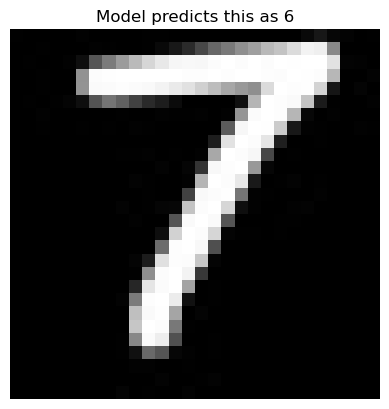

In [39]:
#allow the model to test for any image
with torch.no_grad():
    
    img = Image.open('./MNIST_self_images/test.jpg').convert('L') #converts into greyscale image
    
    transform = transforms.ToTensor() #THIS IS REQUIRED!! NO SHORTCUTS!!!! IS PYTORCH STUPID??
    img_tensor = transform(img) #turn tensor into image
    img_tensor = 1 - img_tensor #0 is now black, following MINST stuff, and for some reason img had 3 values , or something, idk man
    
    y_predict = model(img_tensor.reshape(-1,input_size))
    
    label_predict = torch.max(y_predict,1)[1].item()
    print(y_predict)
    plt.imshow(img_tensor.squeeze(), cmap = 'gray')
    plt.title(f'Model predicts this as {label_predict}')
    plt.axis('off')
    plt.show()
    img.close()
    
#captains log. It was rigged. It was all rigged. The numbers in MNIST database are all so goofy and wonky. No wonder the data 
#model predicted absolute rubbish for my drawings. Actually scammed. It was pretty accurate for the test database though
#so i guess there's that. so dumb.

torch.Size([1, 28, 28])


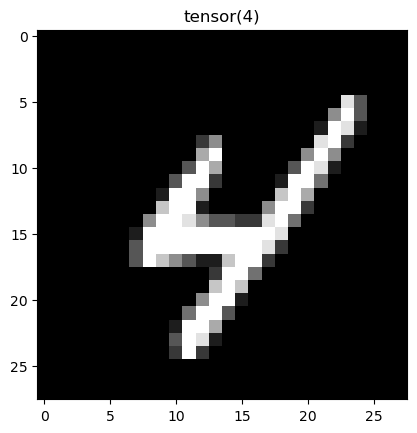

In [12]:

image, label = next(iter(train_loader))
print(image[0].size())
plt.imshow(image[0].squeeze(), cmap = 'gray')
plt.title(str(label[0]))
plt.show()

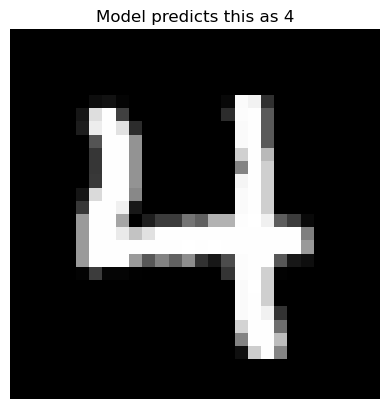

In [38]:
with torch.no_grad():
    image, label = test_data[np.random.randint(0,10000)]
    y_predict = model(image.reshape(-1,input_size))
    
    label_predict = torch.max(y_predict,1)[1].item()
    plt.imshow(image.squeeze(), cmap = 'gray')
    plt.title(f'Model predicts this as {label_predict}')
    plt.axis('off')
    plt.show()


    

In [304]:
#hyperparameters:




















